# Introduction <a id ="1"></a>
If a dataset do not have any labels associated with it, then unsupervised algorithms are used to find some structure in it. These structures can be different types of data pattern or group of data. K-Means clustering is most commonly used unsupervised learning algorithm to find groups in unlabeled data. Here K represents the number of groups or clusters and the process of creating these groups is known as 'clustering', that why the name K-means clustering.


# Uses <a id ="2"></a>
* **Search engine**: Search engine, groups results together using clustering algorithm
* **Customer segmentation**: K-mean clustering can be used to create customer clusters based on demographic information, geographical information and behavioral data.
* **Social network analysis**: To find groups of people with specific interest to direct the personalized ads.
* **Data center**: To organize the computer clusters in data center.
* **Inventory management**: Create inventory clusters based on sales number and manufacturing capacity

# Inner Working of K-Means Clustering <a id ="3"></a>
K-means is often referred to as Lloyd’s algorithm. It is one of the most popular clustering algorithm. Refer below plot where there are two clusters (K=2) one is of red data points and another one of green data points.

![Two_Cluster_Centroid_With_Datapoints](https://raw.githubusercontent.com/satishgunjal/images/master/Two_Cluster_Centroid_With_Datapoints.png)

So how does K-Means algorithm find the clusters of the data points without any label? Below steps will explain the inner working of K-Means algorithm.

* First step is to finalize the number of clusters you want to identify in your data. This is the "K" in K-means clustering.
* Now randomly initialize the points equal to the number of clusters K. 'Cluster Centroid' is the terminology used to refer these points.
* Note that centroid means center point of given dataset, but initially these points are at random location, but at the end when K-Means algorithm will converge they will be at the center of their respective cluster.
* Once cluster centroids are defined, K-means algorithm will go through each data point from given data and depending on that points closeness to cluster centroid, it will assign the data point to the cluster centroid. This is called as 'Assignment Step'.
* In order to move the cluster centroids from random location to their respective group, K-means algorithm will find the mean of each data point assigned to the cluster centroid and move the respective centroid to the mean value location. This is called as 'Move Centroid Step'
* Note that during 'Move Centroid Step' data points can get reassigned from one cluster to another as centroid position change.
* Now repeat the assignment and move centroid steps till cluster centroid position don't change. K-means algorithm will converge when we get the unchanged position of cluster centroids.
* Once K-means algorithm is converged, data point assigned to respective centroid will represent the respective cluster.
* During cluster assignment step if we found a centroid who has no data point associated with it, then it's better to remove it.

![Inner_Working_K_Means](https://raw.githubusercontent.com/satishgunjal/images/master/Inner_Working_K_Means.png)

Since we have to randomly pick the cluster centroids, it's initialization may affect the final outcome of the clustering. In case our initialization is not correct, then K-Means algorithm may form a cluster with few points only. Such situation is referred as 'centroid random initialization trap' and it may cause algorithm to get stuck at local optima.

Check below plots, where for same dataset, we end up getting different clusters depending on initial position of cluster centroids. Gray color squares represent the initial positions of centroids and red, green and blue squares represent the final position of centroids.

![Centroid_Random_Initialization_Trap](https://raw.githubusercontent.com/satishgunjal/images/master/Centroid_Random_Initialization_Trap.png)

# Random Initialization Guidelines <a id ="4"></a>
To avoid random initialization trap, follow below guidelines for random initialization.

* Number of cluster centroids should be less than number of training examples
* To avoid local optima issue, try to do multiple random initialization of centroids.
* Multiple random initialization technique is more effective when we have a small number of clusters.
* Similarly for large number of clusters, few random initialization are sufficient

# Choosing The Number of Clusters <a id ="5"></a>
So using random initialization we can avoid the local optima issue, but to choose how many clusters to look for in a given data we can use below methods.

## Visualization <a id ="6"></a>
To find the number of clusters manually by data visualization is one of the most common method. Domain knowledge and proper understanding of given data also help to make more informed decisions. Since its manual exercise there is always a scope for ambiguous observations, in such cases we can also use 'Elbow Method'

## Elbow Method <a id ="7"></a>
In Elbow method we run the K-Means algorithm multiple times over a loop, with an increasing number of cluster choice(say from 1 to 10) and then plotting a clustering score as a function of the number of clusters. Clustering score is nothing but sum of squared distances of samples to their closest cluster center. Elbow is the point on the plot where clustering score (distortion) slows down, and the value of cluster at that point gives us the optimum number of clusters to have. But sometimes we don't get clear elbow point on the plot, in such cases its very hard to finalize the number of clusters.

![K_Means_Elbow_Method](https://raw.githubusercontent.com/satishgunjal/images/master/K_Means_Elbow_Method.png)


# Advantages <a id ="8"></a>
* One of the simplest algorithm to understand
* Since it uses simple computations it is relatively efficient
* Gives better results when there is less data overlapping

# Disadvantages <a id ="9"></a>
* Number of clusters need to be defined by user
* Doesn't work well in case of overlapping data
* Unable to handle the noisy data and outliers
* Algorithm fails for non-linear data set

## Import The Library <a id ="11"></a>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Load Data <a id ="12"></a>
* We are going to use ‘Mall_Customers.csv’ CSV file
* Dataset contains 5 columns CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
sc = StandardScaler()
df['Annual Income (k$)'] = sc.fit_transform(df[['Annual Income (k$)']])
df['Spending Score (1-100)'] = sc.fit_transform(df[['Spending Score (1-100)']])

## Understanding The Data <a id ="13"></a>
* There are total 200 training example without any label to indicate which customers belong to which groups
* We are going to use annual income and spending score to find the clusters in data. Note that spending score is from 1 to 100 which is assigned by the mall based on customer behavior and spending nature

Scaling is important to KMeans clustering, but in this case, both ANNUAL INCOME AND SPENDING SCORE are in the same range. Thus, we do not perform scaling, but that's fine if you do.

Visualize ANNUAL INCOME AND SPENDING SCORE

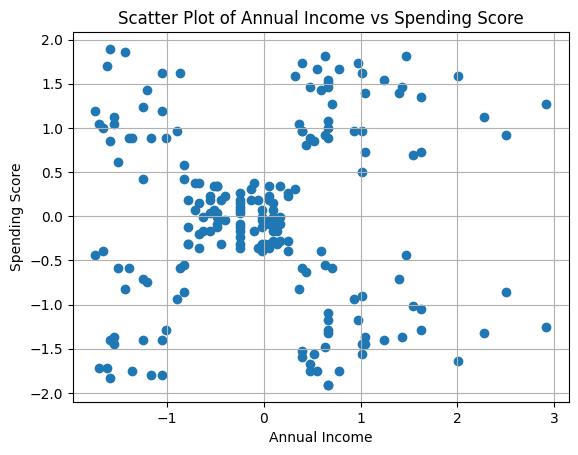

In [ ]:
# Create a scatter plot for annual income and spending score
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(True)  # Adds a grid for better readability
plt.show()  # Display the plot

In [ ]:
# Since we are going to use Annual Income and Spending Score  columns only, lets create 2D array of these columns for further use
X = df.iloc[:, [3,4]].values

## Choosing The Number of Clusters <a id ="14"></a>
By visual inspection of above scatter plot, we can identify 5 possible clusters. But since there is no other information available its very difficult say it with 100% confidence. So lets try to verify this with Elbow method technique.

### Elbow Method <a id ="15"></a>
* Using the elbow method to find the optimal number of clusters. Let's use 1 to 11 as range of clusters.
* We will use 'random' initialization method for this study.
* Note that Sklearn K-Means algorithm also have ‘k-means++’ initialization method. It selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

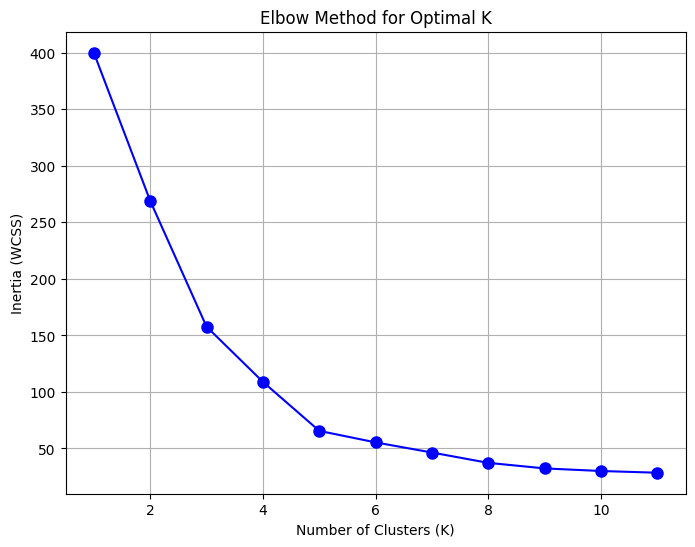

In [ ]:
# Assuming X is your dataset
inertia = []  # List to store the inertia for each K

# Define the range for K
K_range = range(1, 12)  # 1 to 11 inclusive

# Run K-means for each K and store the inertia
for K in K_range:
    kmeans = KMeans(n_clusters=K, init='random', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


From above elbow plot its clear that clustering scores slows down after 5 number of clusters. So we can use K= 5 for further analysis.

## Compute K-Means Clustering <a id ="16"></a>
Compute cluster centers and predict cluster index for each sample. Since K=5 we will get the cluster index from 0 to 4 for every data point in our dataset.

In [ ]:
kmeans= KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

'pred' contains the values index( 0 to 4) cluster for every training example. Let's add it to original dataset for better understanding.

In [ ]:
df['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', df['Cluster'].value_counts())
df

Number of data points in each cluster= 
 Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,-1.738999,-0.434801,4
1,2,Male,21,-1.738999,1.195704,2
2,3,Female,20,-1.700830,-1.715913,4
3,4,Female,23,-1.700830,1.040418,2
4,5,Female,31,-1.662660,-0.395980,4
...,...,...,...,...,...,...
195,196,Female,35,2.268791,1.118061,1
196,197,Female,45,2.497807,-0.861839,3
197,198,Male,32,2.497807,0.923953,1
198,199,Male,32,2.917671,-1.250054,3


## Visualization <a id ="17"></a>
Let's plot the centroid and cluster with different colors to visualize, how K-Means algorithm has grouped the data.

Text(0.5, 1.0, 'Customer Clusters')

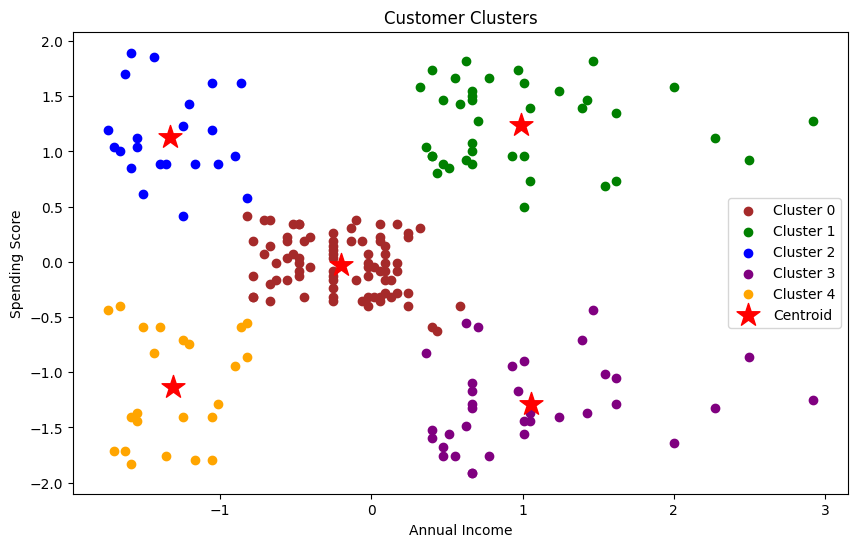

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Customer Clusters')

## Inner Working <a id ="18"></a>
Using below code we can visualize the inner working of K-Means algorithm.

* To start with we will define the random centroids. You can see in below plot that initial centroids with original data without any clusters.
* In step 1 we will run the K-Means algorithm only for one iteration and plot the new position of centroid. Notice how centroid position changes and clusters started to form around it.
* In step 2, we will run the K-Means algorithm for two iterations. Notice how data points are reassigned from one cluster to another as centroid position change
* Similarly at the end we run the K-Means algorithm for six iterations, where we get the final location of centroids and associated clusters.

In [ ]:
def plot_k_means_progress(centroid_history,n_clusters, centroid_sets, cluster_color):
    """
    This function will plot the path taken by the centroids

    I/P:
    * centroid_history: 2D array of centroids. Each element represent the centroid coordinate.
      If there are 5 clusters then first set contains initial cluster cordinates
      (i.e. first 5 elements) and then k_means loop will keep appending new cluster coordinates for each iteration
    * n_clusters: Total number of clusters to find
    * centroid_sets: At the start we set random values as our first centroid set. K-Means loop will keep adding
    new centroid sets to centroid_history. Since we are ploting the path of centroid locations, centroid set value
    will be K-Means loop iteration number plus 1 for initial centroid set.
    So its value will be from 2 to K-Means loops max iter plus 1
    * cluster_color: Just to have same line and cluster color

    O/P: Plot the centroid path
    """
    c_x = [] # To store centroid X coordinated
    c_y=[]   # To store the centroid Y coordinates
    for i in range(0, n_clusters):
        cluster_index = 0
        for j in range(0, centroid_sets):
            c_x = np.append(c_x, centroid_history[:,0][i + cluster_index])
            c_y = np.append(c_y, centroid_history[:,1][i + cluster_index])
            cluster_index = cluster_index + n_clusters
            # if there are 5 clusters then first set contains initial cluster cordinates and then k_means loop will keep appending new cluster coordinates for each iteration

        plt.plot(c_x, c_y, c= cluster_color['c_' + str(i)], linestyle='--')

        # Reset coordinate arrays to avoid continuous lines
        c_x = []
        c_y=[]

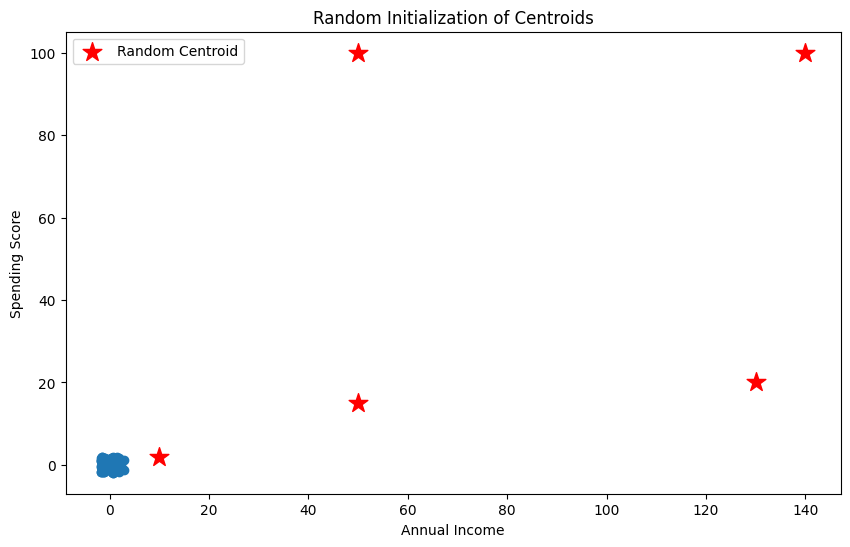

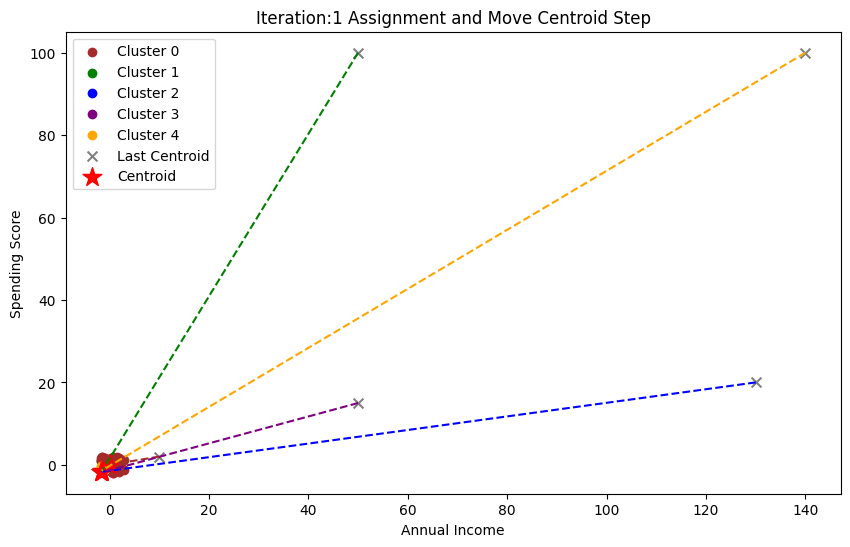

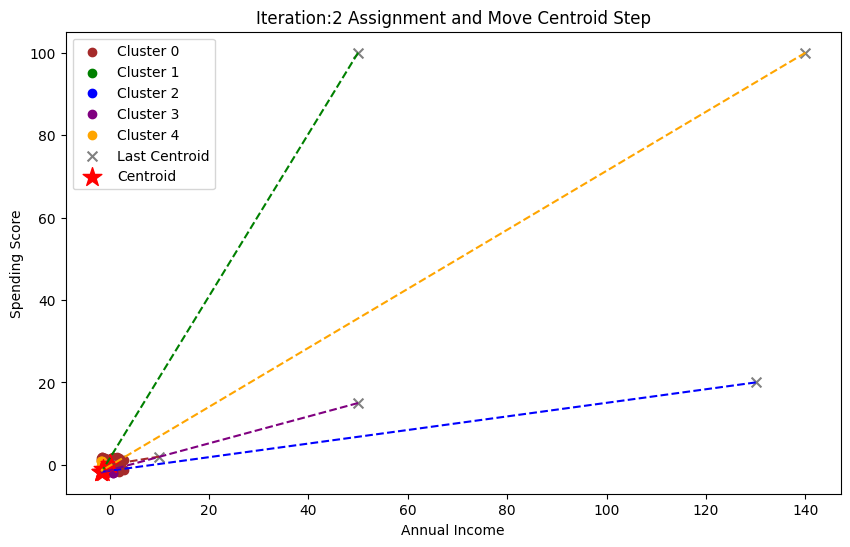

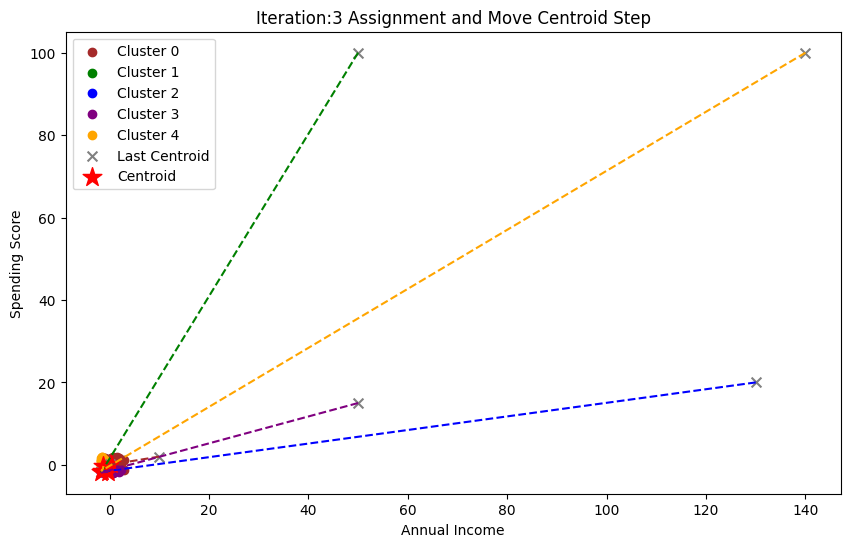

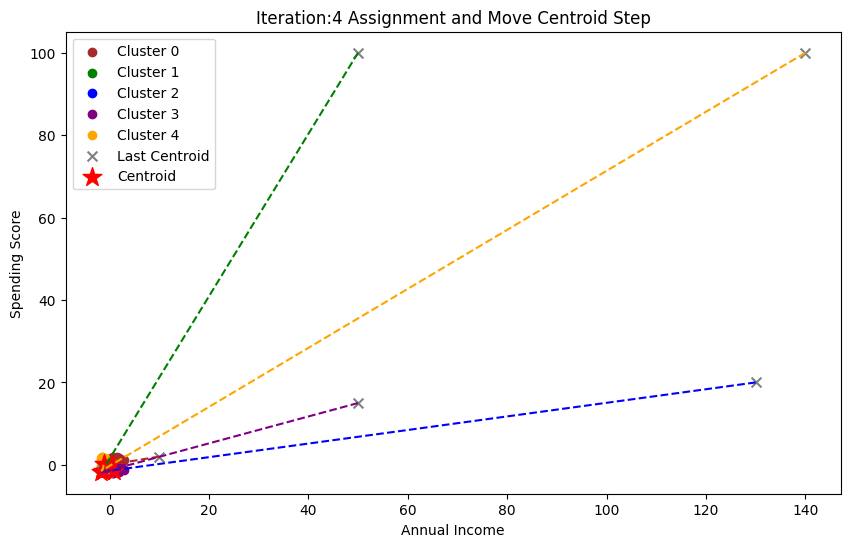

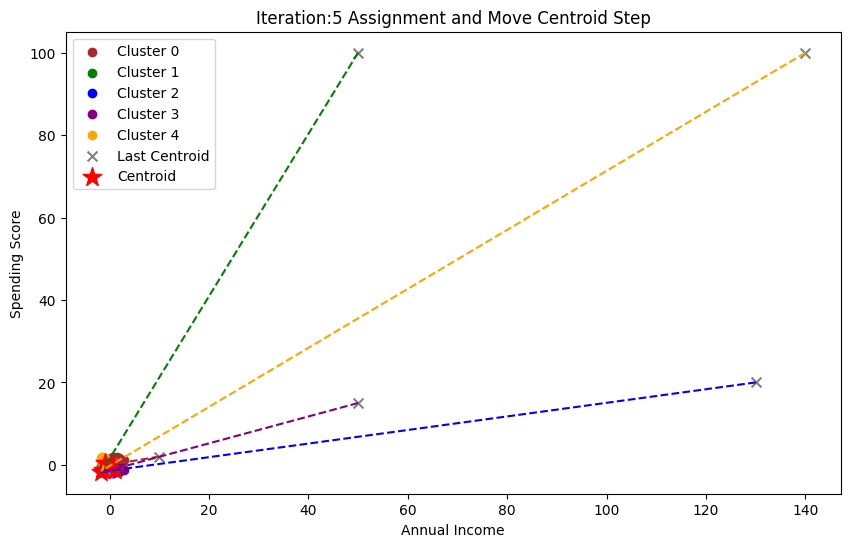

In [ ]:
plt.figure(figsize=(10,6))

# Random Initialization of Centroids
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
initial_centroid = np.array([[10, 2], [50,100], [130,20], [50,15], [140,100]])

plt.scatter(initial_centroid[:,0], initial_centroid[:, 1],s = 200, c = 'red', label = 'Random Centroid', marker='*')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Random Initialization of Centroids')

# K-Means loop of assignment and move centroid steps
centroid_history = []
centroid_history = initial_centroid
#
cluster_color= {'c_0':'brown','c_1':'green','c_2':'blue','c_3':'purple','c_4':'orange'}
n_clusters = 5
for i in range(1,6):
    kmeans= KMeans(n_clusters, init= initial_centroid, n_init= 1, max_iter= i, random_state = 42)  #n_init= 1 since our init parameter is array

    # Compute cluster centers and predict cluster index for each sample
    pred = kmeans.fit_predict(X)

    plt.figure(figsize=(10,6))
    plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
    plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
    plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
    plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
    plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')

    plt.scatter(centroid_history[:,0], centroid_history[:, 1],s = 50, c = 'gray', label = 'Last Centroid', marker='x')

    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 200, c = 'red', label = 'Centroid', marker='*')

    centroid_history = np.append(centroid_history, kmeans.cluster_centers_, axis=0)

    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.title('Iteration:' + str(i) + ' Assignment and Move Centroid Step')

    centroid_sets = i + 1 # Adding one for initial set of centroids
    plot_k_means_progress(centroid_history,n_clusters, centroid_sets, cluster_color)

# Inner Working: GIF <a id ="19"></a>

Isn't a GIF makes a K-Means clustering visualization even more satisfying!


![K_means_Clustering](https://raw.githubusercontent.com/satishgunjal/images/master/K_means_Clustering.gif)